In [1]:
!pip install pytorch-tabnet scikit-learn imbalanced-learn pandas numpy torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 14.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 18.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 7.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from pytorch_tabnet.tab_model import TabNetClassifier
import torch


In [6]:
df = pd.read_csv('new_lung_cancer.csv')

In [7]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,...,SWALLOWING_DIFFICULTY,CHEST_PAIN,EXERCISE_FREQUENCY,DIET_QUALITY,FAMILY_HISTORY,OCCUPATIONAL_HAZARD,ENVIRONMENTAL_EXPOSURE,BMI,SLEEP_HOURS,LUNG_CANCER
0,M,78,2,2,1,1,2,1,1,1,...,1,2,2,3,0,0,0,17.7,4.4,NO
1,F,55,2,1,1,2,1,1,2,1,...,2,1,3,2,1,1,0,35.8,8.8,NO
2,F,54,1,2,2,1,2,1,1,2,...,1,1,4,3,1,1,1,31.8,9.7,YES
3,F,18,1,1,1,1,1,2,1,1,...,1,2,5,7,1,0,0,19.4,6.8,YES
4,F,47,1,2,2,2,1,2,1,2,...,2,2,5,4,0,0,1,22.2,4.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17860,M,77,1,2,2,1,1,2,1,2,...,2,1,1,6,1,1,1,16.0,4.6,YES
17861,M,49,1,2,1,1,1,2,2,2,...,2,2,2,4,1,1,1,21.7,8.2,NO
17862,F,38,1,2,2,1,1,1,2,2,...,2,1,2,6,0,0,0,34.5,7.8,NO
17863,F,50,1,1,2,1,1,1,2,2,...,1,2,4,8,1,1,1,24.2,7.0,YES


In [8]:
print(f"Shape of The Dataset : {df.shape}")

Shape of The Dataset : (17865, 23)


In [9]:
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17865 entries, 0 to 17864
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GENDER                  17865 non-null  object 
 1   AGE                     17865 non-null  int64  
 2   SMOKING                 17865 non-null  int64  
 3   YELLOW_FINGERS          17865 non-null  int64  
 4   ANXIETY                 17865 non-null  int64  
 5   PEER_PRESSURE           17865 non-null  int64  
 6   CHRONIC_DISEASE         17865 non-null  int64  
 7   FATIGUE                 17865 non-null  int64  
 8   ALLERGY                 17865 non-null  int64  
 9   WHEEZING                17865 non-null  int64  
 10  ALCOHOL_CONSUMING       17865 non-null  int64  
 11  COUGHING                17865 non-null  int64  
 12  SHORTNESS_OF_BREATH     17865 non-null  int64  
 13  SWALLOWING_DIFFICULTY   17865 non-null  int64  
 14  CHES

In [10]:
print(f"Summary of This Dataset :")
df.describe()

Summary of This Dataset :


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,...,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,EXERCISE_FREQUENCY,DIET_QUALITY,FAMILY_HISTORY,OCCUPATIONAL_HAZARD,ENVIRONMENTAL_EXPOSURE,BMI,SLEEP_HOURS
count,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,...,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000
mean,50.932942,1.499636,1.496278,1.494822,1.498573,1.498461,1.506689,1.497173,1.496669,1.504394,...,1.500364,1.495326,1.505849,3.477526,5.484635,0.497061,0.502099,0.493815,27.421584,7.004607
std,19.388421,0.500014,0.500000,0.499987,0.500012,0.500012,0.499969,0.500006,0.500003,0.499995,...,0.500014,0.499992,0.499980,2.277335,2.879211,0.500005,0.500010,0.499976,7.215595,1.730744
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,4.000000
25%,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,21.200000,5.500000
50%,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,3.000000,5.000000,0.000000,1.000000,0.000000,27.400000,7.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,5.000000,8.000000,1.000000,1.000000,1.000000,33.600000,8.500000
max,84.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,7.000000,10.000000,1.000000,1.000000,1.000000,40.000000,10.000000


In [11]:
df.describe(include=object)

,GENDER,LUNG_CANCER
count,17865,17865
unique,2,2
top,F,YES
freq,9014,10776


LUNG_CANCER
YES    10776
NO      7089
Name: count, dtype: int64


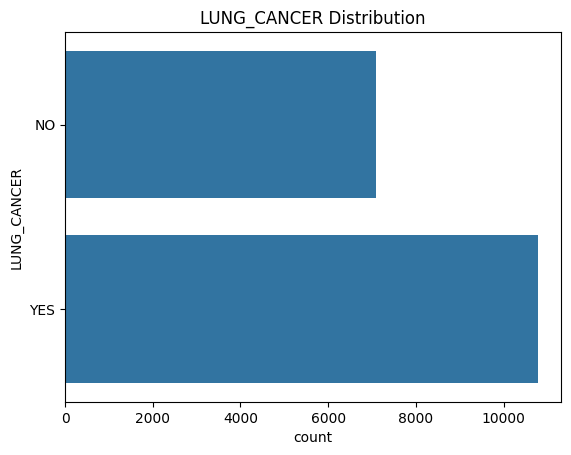

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class balance
print(df['LUNG_CANCER'].value_counts())
sns.countplot(df['LUNG_CANCER'])
plt.title("LUNG_CANCER Distribution")
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Encode categorical columns
encoder = LabelEncoder()
X['GENDER'] = encoder.fit_transform(X['GENDER'])  # Encode GENDER as 0 and 1
y = encoder.fit_transform(y)  # Encode LUNG_CANCER as 0 (NO) and 1 (YES)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))  # Output: {0: <count>, 1: <count>}

{0: 10776, 1: 10776}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [33]:
# Encode categorical variables
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])


In [34]:

# Separate features and target
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print(f"Original dataset size: {len(y)}")
print(f"Resampled dataset size: {len(y_resampled)}")


Original dataset size: 17865
Resampled dataset size: 21552


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print(f"Training size: {X_train.shape[0]}")
print(f"Testing size: {X_test.shape[0]}")

Training size: 17241
Testing size: 4311


In [ ]:
tabnet_clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5, gamma=1.5,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="entmax"
)

# Train model
tabnet_clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['test'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=20,
    batch_size=256,
    virtual_batch_size=128
)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.95877 | test_accuracy: 0.51171 |  0:00:03s
epoch 1  | loss: 0.69923 | test_accuracy: 0.50406 |  0:00:07s
epoch 2  | loss: 0.69688 | test_accuracy: 0.51148 |  0:00:11s
epoch 3  | loss: 0.69509 | test_accuracy: 0.51821 |  0:00:15s
epoch 4  | loss: 0.69481 | test_accuracy: 0.51914 |  0:00:18s
epoch 5  | loss: 0.69348 | test_accuracy: 0.52076 |  0:00:22s
epoch 6  | loss: 0.69231 | test_accuracy: 0.51612 |  0:00:26s
epoch 7  | loss: 0.69079 | test_accuracy: 0.5305  |  0:00:30s
epoch 8  | loss: 0.69105 | test_accuracy: 0.53537 |  0:00:34s
epoch 9  | loss: 0.69046 | test_accuracy: 0.52726 |  0:00:37s
epoch 10 | loss: 0.69083 | test_accuracy: 0.53375 |  0:00:41s
epoch 11 | loss: 0.69034 | test_accuracy: 0.52053 |  0:00:45s
epoch 12 | loss: 0.68835 | test_accuracy: 0.53282 |  0:00:48s
epoch 13 | loss: 0.68781 | test_accuracy: 0.52586 |  0:00:52s
epoch 14 | loss: 0.68547 | test_accuracy: 0.52285 |  0:00:56s
epoch 15 | loss: 0.68283 | test_accuracy: 0.5312  |  0:00:59s
epoch 16

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.5759684527951752
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.22      0.34      2156
           1       0.54      0.94      0.69      2155

    accuracy                           0.58      4311
   macro avg       0.66      0.58      0.51      4311
weighted avg       0.66      0.58      0.51      4311

Confusion Matrix:


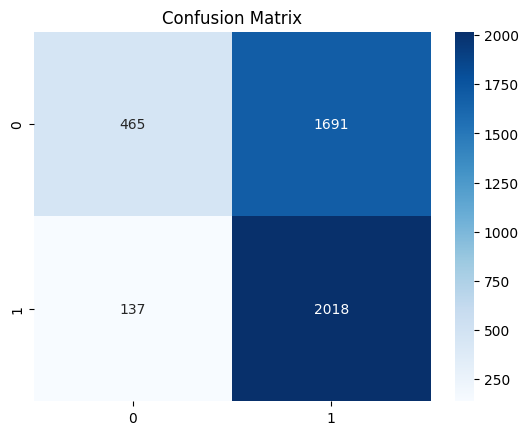

In [29]:
# Predict on test set
y_pred = tabnet_clf.predict(X_test)

# Evaluate performance
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


/var/folders/lv/vt8nn5wx48l9p02mcbgp1s0w0000gp/T/ipykernel_35317/4065838730.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")


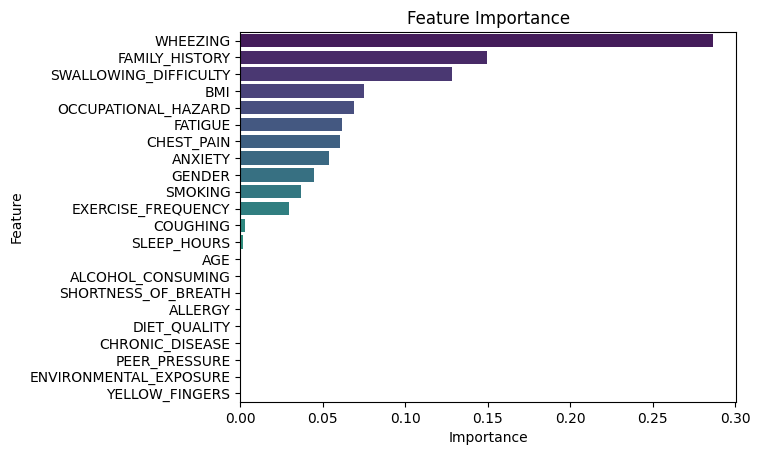

In [31]:
# Feature importance
feature_importance = tabnet_clf.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.title("Feature Importance")
plt.show()
